# Assignment #2 

## Salim M'jahad, msm2243

### Task #1 (OTP)

In [10]:
from e4070_otp_model import *
import e4070_otp_model
import numpy as np
import matplotlib.pyplot as plt

def plot(b_rate, d_rate):
    u_h, v, x_1, x_2, x_3, I = otp_model(alpha_1, beta_1, R, O, 5, 
                                     t_range, b_rate, d_rate, alpha_2,
                                     beta_2, kappa, alpha_3, beta_3,
                                     c, p, I_max, stimulus='parabola')
    u_h, v, x_1, x_2, x_3, I = u_h.squeeze(), v.squeeze(), x_1.squeeze(), x_2.squeeze(), x_3.squeeze(), I.squeeze()

    plt.plot(u_h.squeeze()[:,0], )
    plt.title('Parabola Waveform')
    plt.show()

    for i in range(u_h.shape[1]):
        plt.plot(u_h.squeeze()[:,i])
    plt.title('Output of Peri-receptor Process u*h')
    plt.show()

    for i in range(v.shape[1]):
        plt.plot(v.squeeze()[:,i])
    plt.title('Odorant Concentration Profile v')
    plt.show()

    for i in range(x_1.shape[1]):
        plt.plot(x_1.squeeze()[:,i], )
    plt.title('Output of Bound Receptor Generator X1')
    plt.show()

    for i in range(x_2.shape[1]):
        plt.plot(x_2.squeeze()[:,i])
    plt.title('Co-Receptor Channel Gating Variable Generator X2')
    plt.subplots_adjust(hspace=1)
    plt.show()

    for i in range(x_3.shape[1]):
        plt.plot(x_3.squeeze()[:,i])
    plt.title('Calcium Channel Gating Variable Generator X3')
    plt.show()

    for i in range(I.shape[1]):
        plt.plot(I.squeeze()[:,i])
    plt.title('Transduction Current I')
    plt.show()

#### (b,d) = (1, 132)

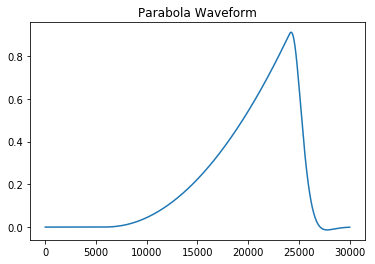

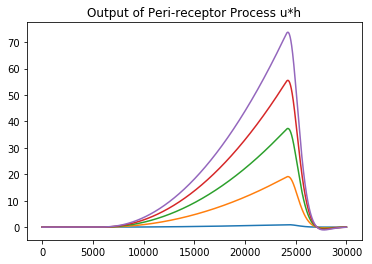

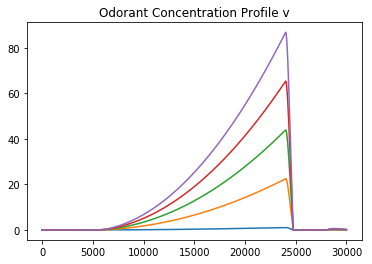

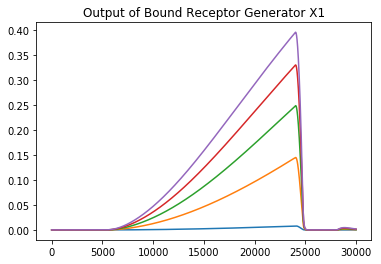

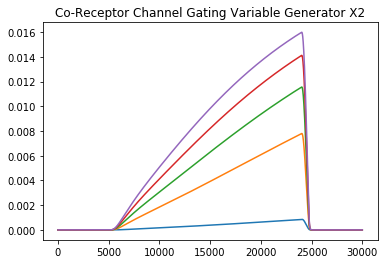

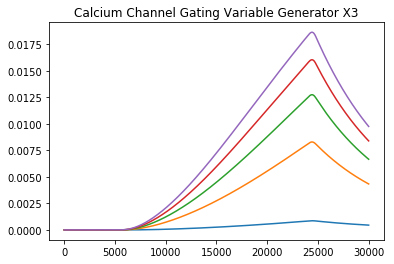

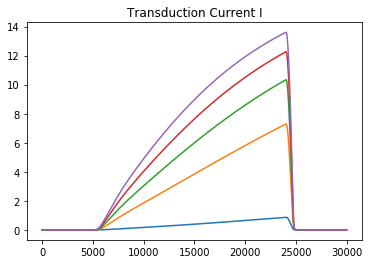

In [9]:
plot(1., 132.)

#### (b,d) = (1, 50)

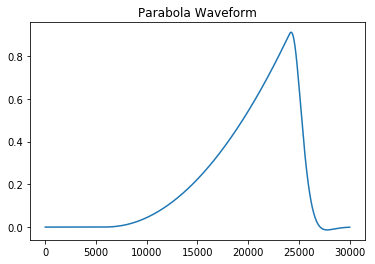

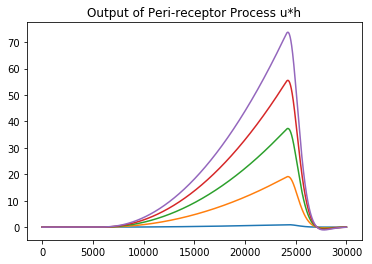

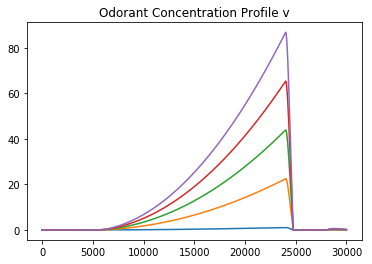

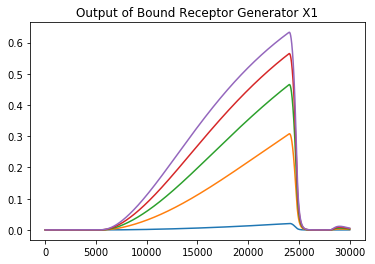

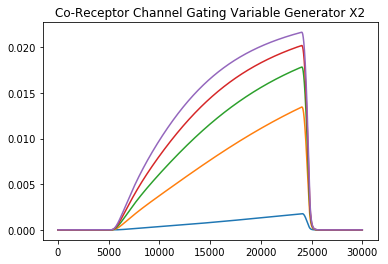

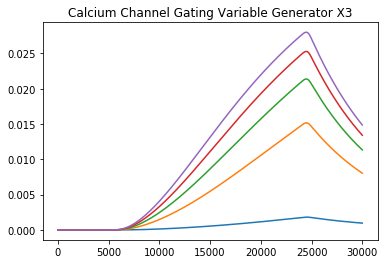

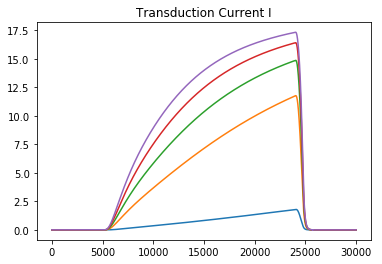

In [10]:
plot(1., 50.)

#### (b,d) = (5, 20)

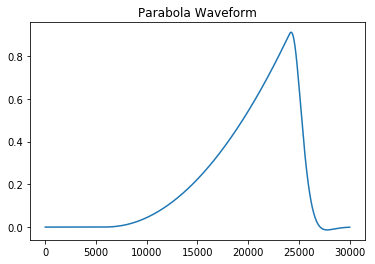

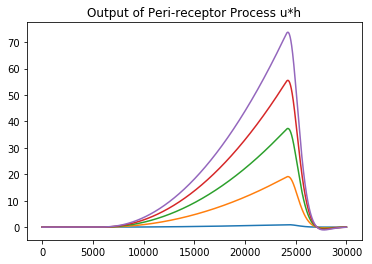

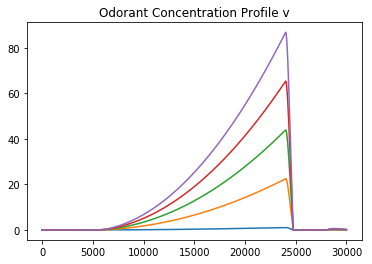

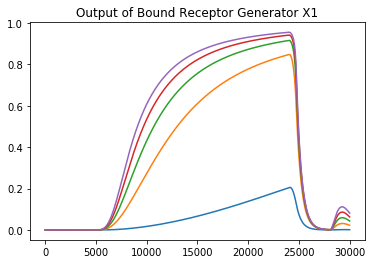

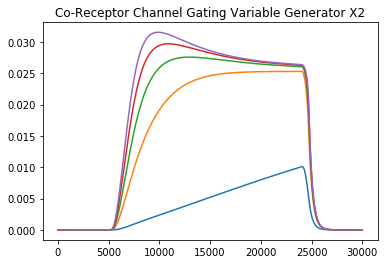

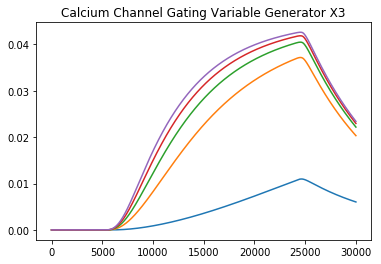

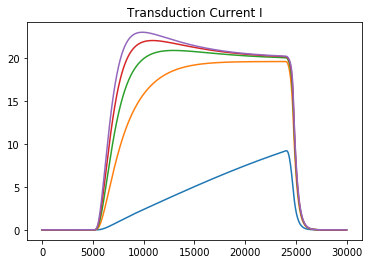

In [15]:
plot(5., 20.)

## (b,d) = (132, 1)

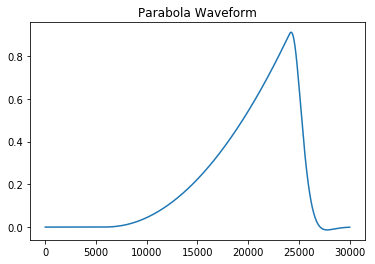

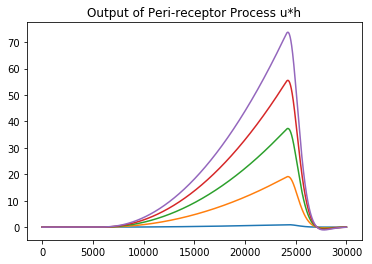

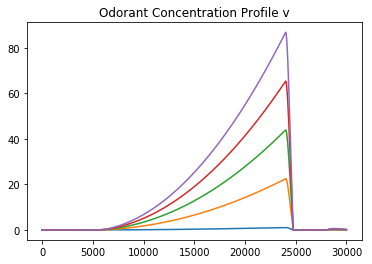

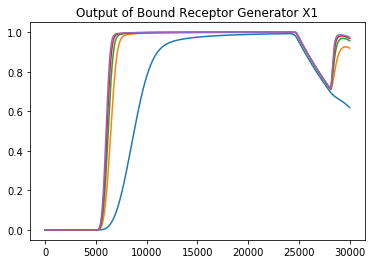

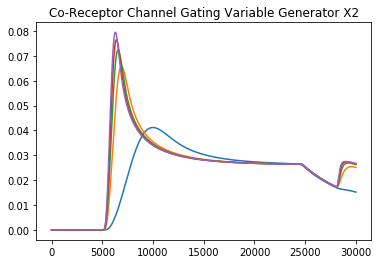

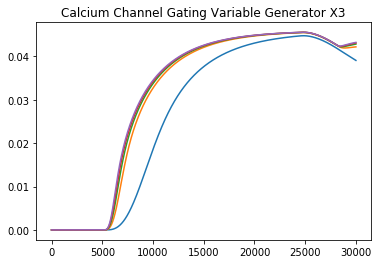

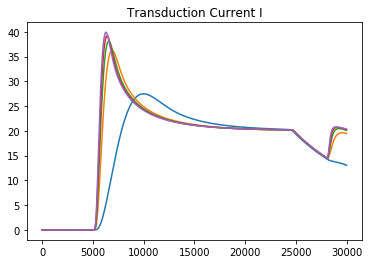

In [12]:
plot(132., 1.)

#### (b,d) = (1, 1)

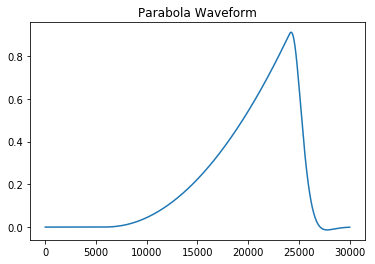

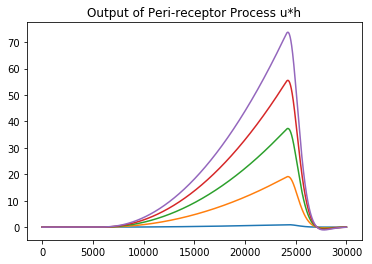

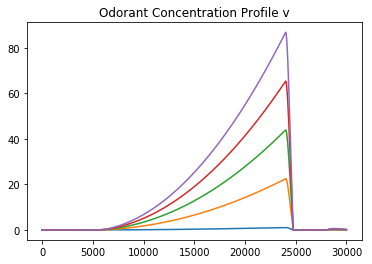

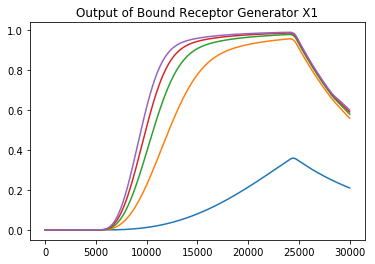

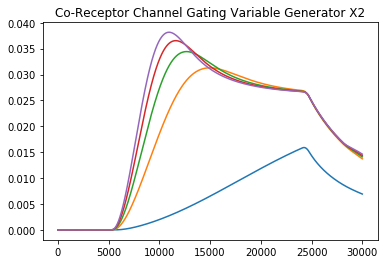

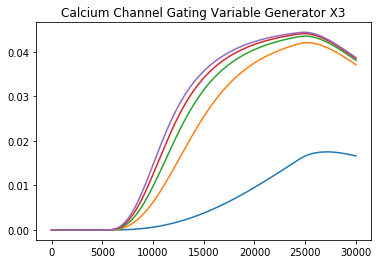

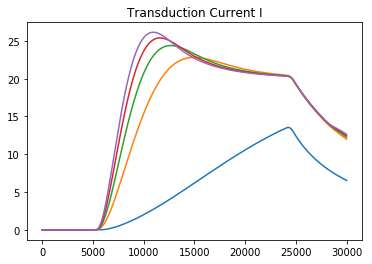

In [13]:
plot(1., 1.)

### Task #2 (BSG)

You are given an implementation of the Hodgkin-Huxley(HH) Neuron model (e4070 library.py) and are asked to implement the Connor-Stevens (CS) model in Python (see the Appendix for the set of CS equations).

In [2]:
from e4070_library import CS_step, HH_step
V=0.
n=0.3178
m=0.0530
h=0.5958
a=0.8
b=0.015
spike=0.
Vprev1=0.
Vprev2=0.

In [3]:
def CS(I, T):
    x_init = [V, n, m, h, a, b, spike, Vprev1, Vprev2]
    time_in_sec = T
    dt = 1e-5
    length = int(time_in_sec/1e-5)
    I_a = I
    X = np.zeros((length,9))
    I = np.ones((length,1)) * I_a
    x = x_init.copy()
    spike_count = 0
    for i in range(X.shape[0]):
        X[i,:] = x
        x = CS_step(1e-5, I[i:i+1,:], X[i:i+1,:])
        if x[:,-3] == 1:
            spike_count +=1
    return X, spike_count

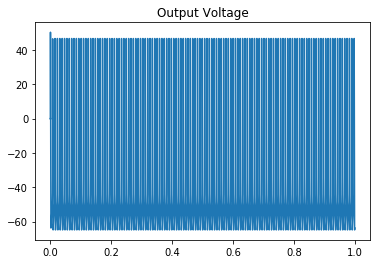

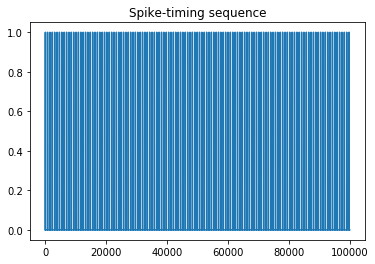

Number of spikes: 131


In [65]:
X, spike_count = CS(20., 1)
plt.plot(np.arange(0, length)*dt,X[:,0])
plt.title('Output Voltage')
plt.show()
plt.plot(X[:,-3])
plt.title('Spike-timing sequence')
plt.show()
print('Number of spikes:', spike_count)

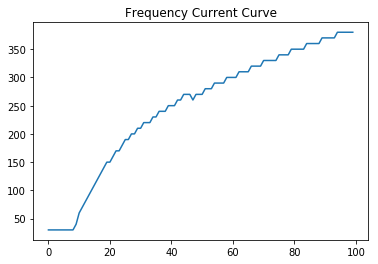

In [68]:
spikes = []
I_range = np.arange(0, 100)
for I in I_range:
    _, spike_count = CS(I, 0.1) #did it for 0.1 sec because it's slow
    spikes.append(spike_count/0.1)
spikes = np.array(spikes)
plt.plot(I_range, spikes)
plt.title('Frequency Current Curve')
plt.show()

### Task #3

In [14]:
def OTP_BSG(b_rate, u_const):
    d_rate = 1 #fixed at one so b/d = b
    u_h, v, x_1, x_2, x_3, I = otp_model(alpha_1, beta_1, R, O, 1, 
                                         np.arange(0,3,1e-4), b_rate, d_rate, alpha_2,
                                         beta_2, kappa, alpha_3, beta_3,
                                         c, p, I_max, stimulus='constant', u_const=u_const)
    u_h, v, x_1, x_2, x_3, I = u_h.squeeze(), v.squeeze(), x_1.squeeze(), x_2.squeeze(), x_3.squeeze(), I.squeeze()
    I_val = I[-1]
#     plt.plot(u_h)
    plt.show()
    _, spike_count = CS(I_val, 0.1) #did it for 0.01 sec because it's slow
    return spike_count/0.1

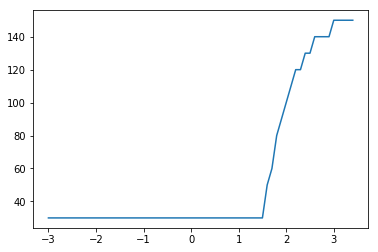

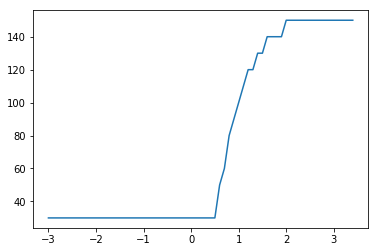

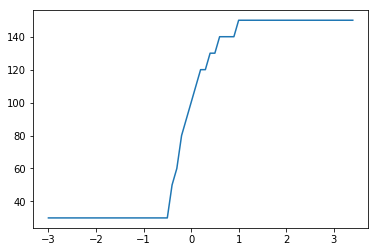

/Users/salimmjahad/code/flybrain/e4070_otp_model.py:84: RuntimeWarning: invalid value encountered in power
  dx_2 = alpha_2 * x_1[i,:,:,:] * (1. - x_2[i,:,:,:]) - beta_2 * x_2[i,:,:,:] - kappa * (x_2[i,:,:,:] ** 0.66) * (x_3[i,:,:,:] ** 0.66)
/Users/salimmjahad/code/flybrain/e4070_otp_model.py:83: RuntimeWarning: overflow encountered in multiply
  dx_1 = b[i,:,:,:] * v[i,:,:,:] * (1. - x_1[i,:,:,:]) - d[i,:,:,:] * x_1[i,:,:,:]
/Users/salimmjahad/code/flybrain/e4070_otp_model.py:89: RuntimeWarning: invalid value encountered in add
  x_1[i+1,:,:,:] = x_1[i,:,:,:] + t_step * dx_1


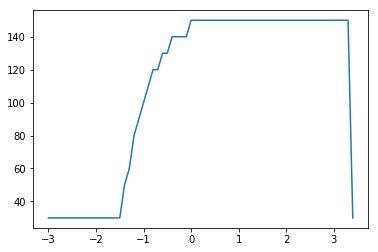

In [19]:
for b_rate in [0.01, 0.1, 1, 10]:
    spike_counts = []
    for i in np.arange(-3,3.5,0.1):
        spike_counts.append(OTP_BSG(b_rate, 10**i))
    plt.plot(np.arange(-3,3.5,0.1), np.array(spike_counts))
plt.show()